# Sensitivity Analysis of the NRG-X-Change Prosumer Payment Function
Hector Lopez 2021 
Florida Atlantic University

## Background
The NRG-X-Change as described by the authors performs a dynamic payment to prosumers that are capable of meeting the demand of the micro-grid. The micro-grid is made of prosumers and consumers. 

"In  this  paper  we  propose  NRG-X-Change - a novel mechanism for trading of locally produced re-newable energy that does not rely on an energy market or matching of orders ahead of time. In our model locally produced energy is continuously fed into the grid and payment is received based on actual usage,rather than predicted, as consumption is measured bythe DSO (Distribution Service Operator) and billed in near real-time." [[1]]

As the load demand spikes the pricing for net generation also spikes to meet the demand. When there is too much generation on the grid the pricing drops encouraging prosumers to generate less and consumer to consume more. 

The payout function is defined as $g(x,t_p,t_c)$ , where $x$ is the prosumer generation, $t_{p}$ is the total production and $t_{p}$ is the total consumption. The payout function utilizes a normalization component in the denominator to account for over or under generation distributing the payout along the curve, as described in [[1]]. The payment is at its highest when generation meets the total demand and at its lowest as generation starts to saturate the market because of low demand. 

$$ g(x,t_p,t_c) = \frac{​​x^n* q_{t_p=t_c}​​}{e^{\frac{(t_p - t_c)^2}{a}}} $$

Where $x$ is the prosumer generation, $t_{p}$ is the total production and $t_{p}$ is the total consumption. The prosumer generation is multipled by the maximum price $q$ where the price is the payment when the total production is equal to the total consumption; ideal state. The $n$ is a design value that would exponentially change the weight of the prosumer contribution for generation (This exponential design variable is analyzed further when considering groupings of prosumers in a coalitional game to maximize economic payouts). The final parameter in the equation is also a design parameter $a$ that can adjust the scale of $g(.)$'s output. 

The porportionality of the output of $g(.)$ with respect to the $a$ parameter is considered in the following sensitivity analysis. The optimal value of $a$ would need to be adjusted based on the scale of $(tp-tc)^{2}$ . 


## Sensitivity Analysis

Consider the function :

$$ g(x,t_p,t_c) = \frac{​​x^n* q_{t_p=t_c}​​}{e^{\frac{(t_p - t_c)^2}{a}}} $$

Analyzing the sensitivity of $a$ in $g(x,t_p,t_c)$ with respect to $(t_p - t_c)^2$ will lead to a formulaic solution to adjust $g(.)$ by understanding its porportional response to $a$. 

$$ S^{a}_{\tau} = \frac{\partial a}{\partial \tau} $$

### Solving for $a$

1. Substitute $(t_p - t_c)^2 $ as $ \tau $ 

$$ g(.) = \frac{​​x^n* q​​}{e^{\frac{\tau}{a}}} $$

2. Take the natural log of both sides

$$\ln(g(.)) = \ln(\frac{​​x^n* q​​}{e^{\frac{\tau}{a}}}) $$

3. Expand the natural log on R.H.S.

$$ \ln(g(.)) = \ln(x^n*q) - \ln(e^{\frac{\tau}{a}}) $$

4. Subtract $\ln(g(.))$ on both sides

$$ 0 = \ln(x^n*q) - \ln(e^{\frac{\tau}{a}}) - \ln(g(.)) $$

5. Add $\ln(e^{\frac{\tau}{a}})$ to both sides

$$ \ln(e^{\frac{\tau}{a}}) = \ln(x^n*q) - \ln(g(.)) $$

6. Combine $ln$ on R.H.S.

$$ \ln(e^{\frac{\tau}{a}}) = \ln(\frac{x^n*q}{g(.)}) $$

7. Simplify on R.H.S , $ln(e^{\alpha})= \alpha$ 

$$ \frac{\tau}{a} = \ln(\frac{x^n*q}{g(.)}) $$

8. Multiply both sides by $a$

$$ \tau = a * \ln(\frac{x^n*q}{g(.)}) $$

9. Divide $\ln(\frac{x^n*q}{g(.)})$ on both sides

$$ \frac{\tau}{\ln(\frac{x^n*q}{g(.)})} = a $$

9. Simplify

$$  a = \tau * \ln(\frac{g(.)}{x^n*q})$$

10. Substitute for $\tau$

$$  a = (t_p - t_c)^2 * \ln(\frac{g(.)}{x^n*q})$$

### Solving for $S^{a}_{\tau}$

12. Consider the following:
$$ S^{a}_{\tau} = \frac{\partial a}{\partial \tau} $$

13. We defined $(t_{p}-t_{c})^2 = \tau$ to solve for $a$ , but lets consider $(t_{p}-t_{c}) = \tau$

$$  a = \tau^2 * \ln(\frac{g(.)}{x^n*q})$$

14. Take the partial derivative with respect to $\tau$

$$ \frac{\partial a}{\partial \tau} = \frac{\partial}{\partial \tau} (\tau^2 * ln(\frac{g(.)}{x^n*q}))$$

15. Take the partial derivative with respect to $\tau$

$$ \frac{\partial a}{\partial \tau} = 2 * \tau * ln(\frac{g(.)}{x^n*q}))$$




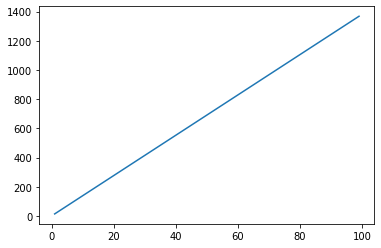

In [10]:
import matplotlib.pyplot as plt
import numpy as np
tau = np.arange(1,100)
g_x_q = 1000
da_dt = 2*tau*np.log(g_x_q)
plt.plot(tau,da_dt)
plt.show()


## Multi-Variable Function Analysis of g(.)

Partial derivatives of the g() can be taken with respect to each of the input variables. 

Lets, consider $a$ as a variable and not a designed scaled constant. This would allow us to understand the movement of this variable and its effect on g().

Redefine variables for simplicity:
- Substitute $x^n * q$ for $\gamma$ 
- Substitute $t_p - t_c$ for $\tau$ 

Therefore : 

11.1 $$ g(\gamma,\tau,a) = \frac{​​\gamma}{e^{\frac{\tau}{a}}} $$ 

Take the partial derivatives of each variable with respect to the other two. 

11.2 $$ \frac{\partial g}{\partial \gamma} = \frac{1}{e^{\frac{\tau}{a}}} $$  

11.3 $$ \frac{\partial g}{\partial \tau} = -\frac{\gamma e^-\frac{\tau}{a}}{a} $$  

11.4 $$ \frac{\partial g}{\partial a} = \frac{\gamma \tau e^-\frac{\tau}{a}}{a^2} $$


### Bounding of the 'a' scalar with resepct to g(.)

$$ \lim_{a \to \infty} g(x,t_p,t_c) = \frac{​​x^n* q_{t_p=t_c}​​}{e^{\frac{\tau}{\infty}}} $$

Assuming that the numerator is equal to 0 :

$$  0 = (t_p - t_c)^2  $$
$$  e^{\frac{0}{\infty}} = undefined $$

Assuming that the numerator remain greater than 0 :

$$  0 \lt (t_p - t_c)^2 \lt \infty $$

$$ e^{\frac{1}{\infty}} = e^{0} = 1 $$

Assuming that the numerator goes towards infinity (as fast as 'a') :

$$ e^{\frac{\infty}{\infty}} = e^{1} = 2.718$$


Resulting:


1. When $(t_p - t_c)^2 = 0 $ ; $ \lim_{a \to \infty} g(x,t_p,t_c) = undefined​​ $
2. When $ 0 < (t_p - t_c)^2 < a $ ; $ \lim_{a \to \infty} g(x,t_p,t_c) = ​x^n* q_{t_p=t_c}​​ $
3. When $(t_p - t_c)^2 = a $ ; $ \lim_{a \to \infty} g(x,t_p,t_c) = ​\frac{x^n* q_{t_p=t_c}}{2.718}​​ $

## Reference 
1. Mihail Mihaylov, Sergio Jurado, "NRG-X-ChangeA Novel Mechanism for Trading of Renewable Energy in Smart Grids". R&D Department, Sensing & Control, Barcelona, Spain

## Appendix
Additional derivations for the partial derivative of 'a'

15. Substitute

$$ \frac{\partial a}{\partial \tau} = 2 * (t_{p}-t_{c}) * ln(\frac{g(.)}{x^n*q}))$$

15. Expand

$$ \frac{\partial a}{\partial \tau} = 2*t_{p}*ln(\frac{g(.)}{x^n*q})-2*t_{c}*ln(\frac{g(.)}{x^n*q})$$

15. Expand $ln()$

$$ \frac{\partial a}{\partial \tau} = [2*t_{p}*(ln(g(.)) - ln(x^n*q))]-[2*t_{c}*(ln(g(.)) - ln(x^n*q))]$$

16. Expand 

$$ \frac{\partial a}{\partial \tau} = 2*t_{p}*ln(g(.)) - 2*t_{p}*ln(x^n*q) - 2*t_{c}*ln(g(.)) - 2*t_{c}*ln(x^n*q)$$

16. Combine like terms

$$ \frac{\partial a}{\partial \tau} = [2*ln(g(.))*(t_{p} - t_{c})] - [2*ln(x^n*q)*(t_{c} - t_{p})]$$

17. When derivative is = 0 then it is at its max and min

$$ 0 = [2*ln(g(.))*(t_{p} - t_{c})] - [2*ln(x^n*q)*(t_{c} - t_{p})]$$

$$ [2*ln(x^n*q)*(t_{c} - t_{p})] = [2*ln(g(.))*(t_{p} - t_{c})] $$